## Regresión lineal: Coste de un incidente de seguridad
Fundamentos básicos de la regresión lineal.

El ejercicio consiste en predecir el coste de un incidente en base al número de equipos que se han visto afectados

1. Generación del conjunto de datos

In [12]:
import numpy as np

X = abs(2 * np.random.randn(100, 1))
y = 4 + 3 * X + np.random.randn(100, 1)

print('La longitud del conjunto de datos es: ', len(x))

La longitud del conjunto de datos es:  100


2. Visualización del conjunto de datos

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

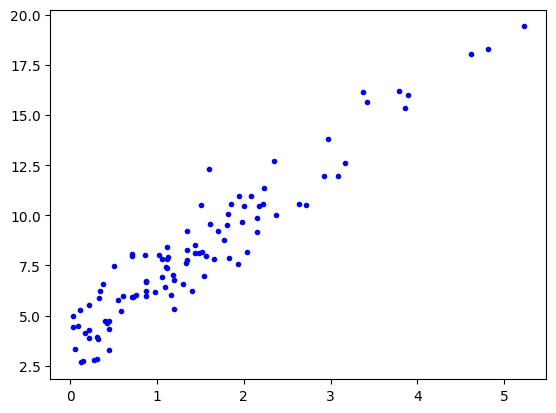

In [14]:
plt.plot(X, y, 'b.')
plt.show()

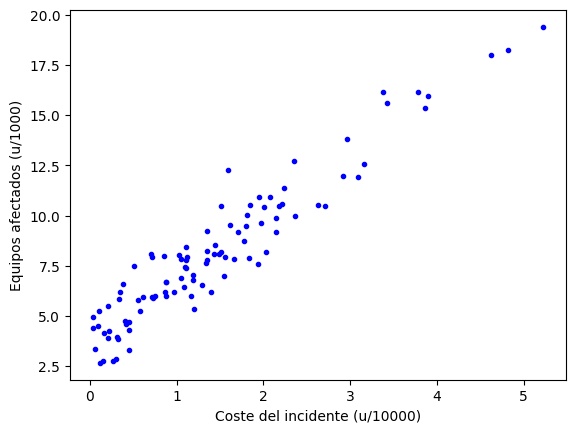

In [15]:
plt.plot(X, y, 'b.')
plt.ylabel('Equipos afectados (u/1000)')
plt.xlabel('Coste del incidente (u/10000)')
plt.show()

3. Modificación del conjunto de datos

In [16]:
import pandas as pd

data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head()

,n_equipos_afectados,coste
0,0.146186,2.749986
1,0.581998,5.225445
2,1.108615,7.802885
3,1.833957,7.874509
4,1.053807,7.826763


In [17]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados']*1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')

# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head()

,n_equipos_afectados,coste
0,146,27499
1,581,52254
2,1108,78028
3,1833,78745
4,1053,78267


Text(0.5, 0, 'Equipos afectados')

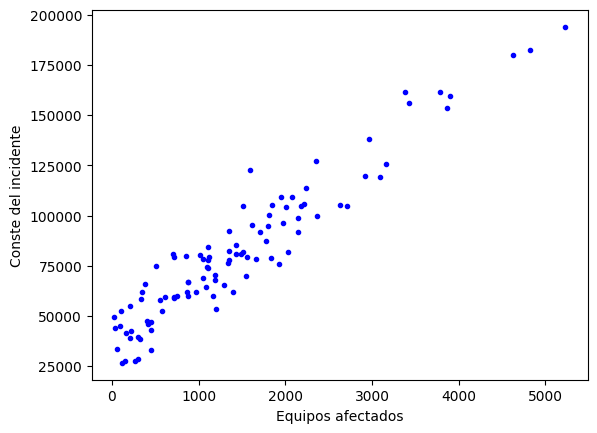

In [19]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.ylabel('Conste del incidente')
plt.xlabel('Equipos afectados')

4. Construcción del modelo

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [22]:
# Parámetro theta 0
lin_reg.intercept_

37971.12336301636

*La forma en la que interpretamos nuestro theta 0 es como el corte en el eje y o lo que sería lo mismo b.*
<p>y = mx + b</p>

In [24]:
# parámetro de teta 1
lin_reg.coef_

array([30.53044938])

La función de nuestra regresión lineal queda de la siguiente forma:
<br>
<br>
$\hat y = xw + b$
<br>
$\hat y$ = Nuestra función hipótesis. <br>
$x$ = Nuestra característica de entrada. <br>
$w$ = El peso de nuestra característica de entrada. 
<br>
<br>
$\hat y = (InputFeature)(30) + 37971$


In [25]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

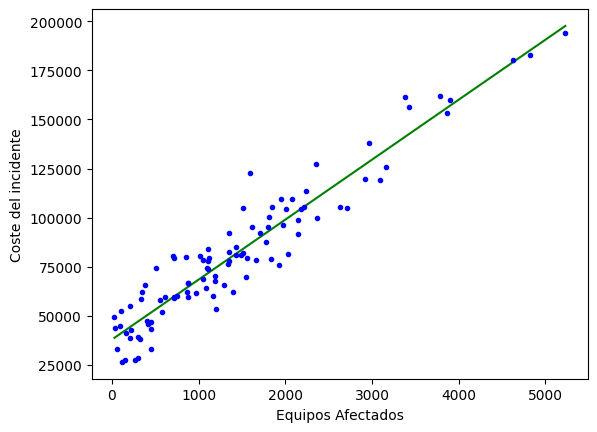

In [26]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel('Equipos Afectados')
plt.ylabel('Coste del incidente')
plt.show()

5. Predicción de nuevos ejemplos

In [31]:
x_new = np.array([[4200]]) # 1200 equipos afectados

# Predicción del coste que tendrá el incidente
coste = lin_reg.predict(x_new)

print('El coste del incidente sería: ', int(coste[0]), '$')

El coste del incidente sería:  166199 $


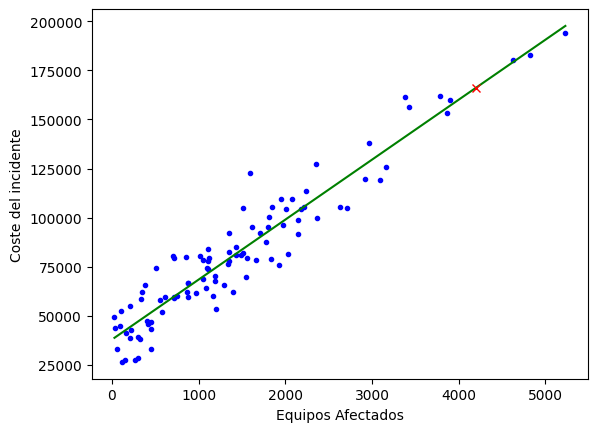

In [32]:
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, coste, 'rx')
plt.xlabel('Equipos Afectados')
plt.ylabel('Coste del incidente')
plt.show()

### Demostración
$\hat y = xw + b$ <br>
$\hat y = 4200(30.53) + 37971.1234 = 166,199.010$